

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a tome series data to be modeled and predicted using RNNs. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [3]:
df = pd.read_csv('RSCCASN.csv',index_col='DATE',parse_dates=True)

In [4]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


In [5]:
# Set name of column as 'Sales'. Use - df.columns 

df.columns = ['Sales']

df.head()

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


<Axes: xlabel='DATE'>

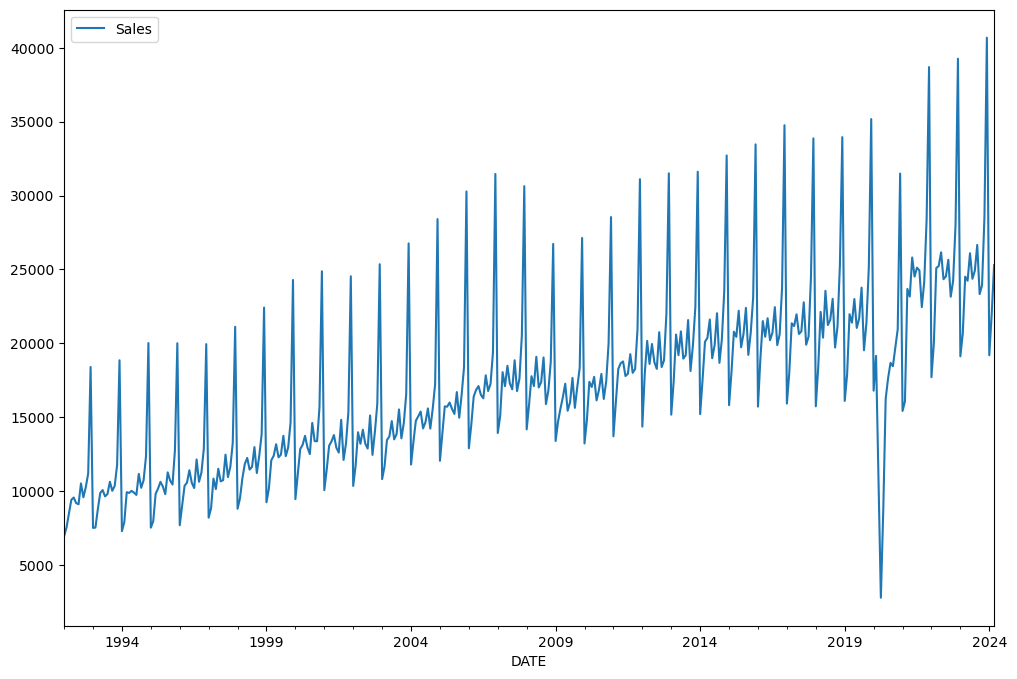

In [6]:
#Plot the data - Year vs Sales

df.plot(figsize=(12,8))

## Next we will do Train Test Split

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [9]:
# Assign variable test size = 18

test_size = 18

In [10]:
# Store length of data in variable length.

data_length = len(df)
data_length

387

In [11]:
len(df)- 18

369

In [12]:
# store training size in varialable train_size 
# (Remember training size = total size - test_size)

train_size = data_length- test_size
train_size

369

In [13]:
# find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

test_index =  train_size

In [14]:
# separate train and test datasets.

train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [15]:
# Print the size of the train data
# Print the size of the test data

print(train.size)
print(test.size)

369
18


In [16]:
# Print the train data

train

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2022-05-01,26156.0
2022-06-01,24338.0
2022-07-01,24530.0


In [17]:
# Print the test data

test

,Sales
DATE,
2022-10-01,24243.0
2022-11-01,28045.0
2022-12-01,39263.0
2023-01-01,19118.0
2023-02-01,20666.0
2023-03-01,24510.0
2023-04-01,24232.0
2023-05-01,26096.0
2023-06-01,24364.0


## Scale Data
between 0-1

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [21]:
# Check if the data has been scaled properly

print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0553158319645888
0.0
0.4549427911249687


# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
#TimeseriesGenerator?

## We will use 12 months as input and then predict the next month out

In [24]:
# Let's redefine to get 12 months back and then predict the next month out
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=length, batch_size=1)

In [25]:
# What does the first batch look like?

X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11586537 0.13217895 0.15865371 0.1844325  0.18880321 0.17833579
 0.17613652 0.21538933 0.18922079 0.20817906 0.23415272 0.43481529]
Predict this y: 
 [[0.13156649]]


### Create the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [28]:
# We're only using one feature in our time series
n_features = 1

In [29]:
# define model

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [46]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=1)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
EarlyStopping?

Init signature:
EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
Docstring:     
Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the
metric to be monitored would be `'loss'`, and mode would be `'min'`. A
`model.fit()` training loop will check at end of every epoch whether
the loss is no longer decreasing, considering the `min_delta` and
`patience` if applicable. Once it's found no longer decreasing,
`model.stop_training` is marked True and the training terminates.

The quantity to be monitored needs to be available in `logs` dict.
To make it so, pass the loss or metrics at `model.compile()`.

Args:
    monitor: Quantity to be monitored. Defaults to `"val_loss"`.
    min_delta: Minimum change in the monitored quantity to qualify as an
        improvement, i.e. an absolute chan

In [49]:
# create an object early-stop.

early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [50]:
# fit model
# IGNORE THE WARNING

history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0018 - val_loss: 0.0081
Epoch 2/30
 48/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021 - val_loss: 0.1789
Epoch 3/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 4/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 5/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 6/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 4.4357e-04
Epoch 7/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0077
Epoch 8/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 10/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 11/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - val_loss: 0.0107


In [51]:
# Get Losses from dataframe (hint - model.history.history)

losses = pd.DataFrame(model.history.history)

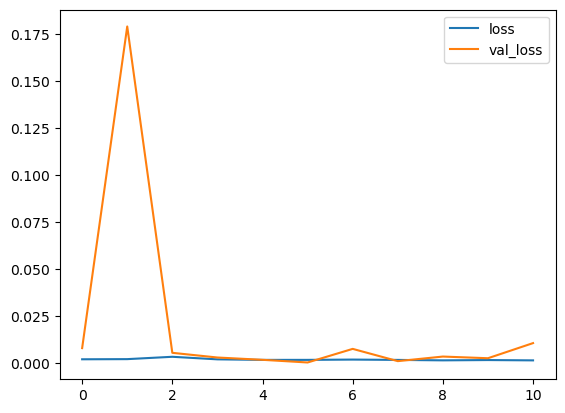

In [52]:
# Plot losses in the dataframe.

losses.plot();

In [53]:
# printing Loss for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Evaluate on Test Data

In [54]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.59486094],
       [0.71362156],
       [1.        ],
       [0.41557863],
       [0.47983074],
       [0.62133571],
       [0.62492692],
       [0.65087275],
       [0.60026169],
       [0.60560675],
       [0.63681412],
       [0.56724479]])

In [55]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59486094],
        [0.71362156],
        [1.        ],
        [0.41557863],
        [0.47983074],
        [0.62133571],
        [0.62492692],
        [0.65087275],
        [0.60026169],
        [0.60560675],
        [0.63681412],
        [0.56724479]]])

In [56]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


array([[0.53441423]], dtype=float32)

In [57]:
scaled_test[0]

array([0.59761699])

## Try predicting the series!

In [58]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59486094],
        [0.71362156],
        [1.        ],
        [0.41557863],
        [0.47983074],
        [0.62133571],
        [0.62492692],
        [0.65087275],
        [0.60026169],
        [0.60560675],
        [0.63681412],
        [0.56724479]]])

In [62]:
for i in range(len(test)):
    
    print(i)
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    
    # store prediction
    test_predictions.append(current_pred) 
    print(test_predictions)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    print(current_batch)

0
1/1 [==============================] - 0s 18ms/step
[0.5484994]
[array([0.5484994], dtype=float32)]
[[[0.48367504]
  [0.52421767]
  [0.55939571]
  [0.88077694]
  [0.38920919]
  [0.41131494]
  [0.64297826]
  [0.62753199]
  [0.71296439]
  [0.67387082]
  [0.69240018]
  [0.54849941]]]
1
1/1 [==============================] - 0s 16ms/step
[0.53870046]
[array([0.5484994], dtype=float32), array([0.53870046], dtype=float32)]
[[[0.52421767]
  [0.55939571]
  [0.88077694]
  [0.38920919]
  [0.41131494]
  [0.64297826]
  [0.62753199]
  [0.71296439]
  [0.67387082]
  [0.69240018]
  [0.54849941]
  [0.53870046]]]
2
1/1 [==============================] - 0s 16ms/step
[0.57039607]
[array([0.5484994], dtype=float32), array([0.53870046], dtype=float32), array([0.57039607], dtype=float32)]
[[[0.55939571]
  [0.88077694]
  [0.38920919]
  [0.41131494]
  [0.64297826]
  [0.62753199]
  [0.71296439]
  [0.67387082]
  [0.69240018]
  [0.54849941]
  [0.53870046]
  [0.57039607]]]
3
1/1 [==============================]

1/1 [==============================] - 0s 17ms/step
[1.1140019]
[array([0.5484994], dtype=float32), array([0.53870046], dtype=float32), array([0.57039607], dtype=float32), array([0.64005566], dtype=float32), array([0.9806017], dtype=float32), array([0.46140015], dtype=float32), array([0.48712626], dtype=float32), array([0.67798007], dtype=float32), array([0.674839], dtype=float32), array([0.7848852], dtype=float32), array([0.74946207], dtype=float32), array([0.77740276], dtype=float32), array([0.62533164], dtype=float32), array([0.61374736], dtype=float32), array([0.6425989], dtype=float32), array([0.7454477], dtype=float32), array([1.1140019], dtype=float32)]
[[[0.46140015]
  [0.48712626]
  [0.67798007]
  [0.67483902]
  [0.78488523]
  [0.74946207]
  [0.77740276]
  [0.62533164]
  [0.61374736]
  [0.64259893]
  [0.7454477 ]
  [1.11400187]]]
17
1/1 [==============================] - 0s 17ms/step
[0.5344475]
[array([0.5484994], dtype=float32), array([0.53870046], dtype=float32), array([0.5

In [60]:
for i in range(len(test)):
    
     #get prediction 1 time stamp ahead ([0] is for 
     #grabbing just the number instead of [array])
     current_pred = model.predict(current_batch)[0]
    
     #store prediction
     test_predictions.append(current_pred) 
    
     #update batch to now include prediction and drop first value
     current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [61]:
test_predictions

[array([0.53441423], dtype=float32),
 array([0.5649685], dtype=float32),
 array([0.80037194], dtype=float32),
 array([0.5420166], dtype=float32),
 array([0.5120151], dtype=float32),
 array([0.60710114], dtype=float32),
 array([0.6352538], dtype=float32),
 array([0.6752449], dtype=float32),
 array([0.6715265], dtype=float32),
 array([0.66692734], dtype=float32),
 array([0.69859123], dtype=float32),
 array([0.6689303], dtype=float32),
 array([0.62410176], dtype=float32),
 array([0.63246685], dtype=float32),
 array([0.7406677], dtype=float32),
 array([0.6772302], dtype=float32),
 array([0.60914576], dtype=float32),
 array([0.63717806], dtype=float32)]

## Inverse Transformations and Compare

In [62]:
# Отменить масштабирование

scaler.inverse_transform?

Signature: scaler.inverse_transform(X)
Docstring:
Undo the scaling of X according to feature_range.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Input data that will be transformed. It cannot be sparse.

Returns
-------
Xt : ndarray of shape (n_samples, n_features)
    Transformed data.
File:      d:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py
Type:      method

In [63]:
true_predictions = scaler.inverse_transform(test_predictions)

In [64]:
true_predictions

array([[21972.69361967],
       [23070.2344355 ],
       [31526.16063291],
       [22245.77920115],
       [21168.09456134],
       [24583.68013638],
       [25594.95128429],
       [27031.47303736],
       [26897.90310627],
       [26732.6968956 ],
       [27870.09565544],
       [26804.64502358],
       [25194.35924923],
       [25494.84181458],
       [29381.52447927],
       [27102.78527099],
       [24657.12486422],
       [25664.07321513]])

In [65]:
# IGNORE WARNINGS

test['Predictions'] = true_predictions

C:\Users\amitk\AppData\Local\Temp\ipykernel_3284\3095654106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


## Check and plot predictions

In [66]:
test

,Sales,Predictions
DATE,,
2022-10-01,24243.0,21972.693620
2022-11-01,28045.0,23070.234435
2022-12-01,39263.0,31526.160633
2023-01-01,19118.0,22245.779201
2023-02-01,20666.0,21168.094561
2023-03-01,24510.0,24583.680136
2023-04-01,24232.0,25594.951284
2023-05-01,26096.0,27031.473037
2023-06-01,24364.0,26897.903106


<Axes: xlabel='DATE'>

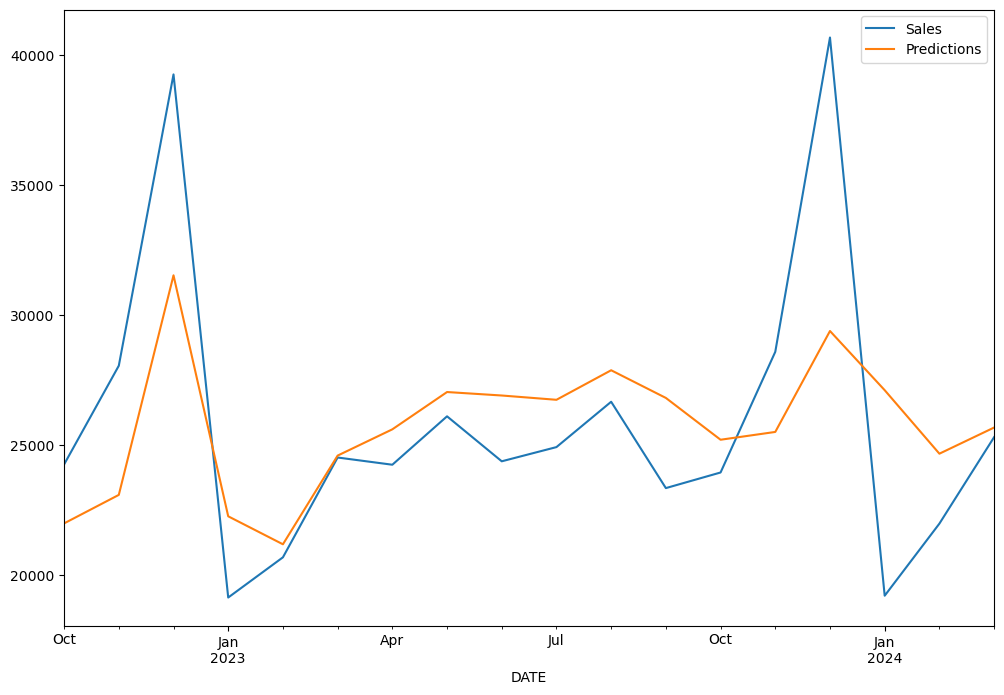

In [67]:
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [68]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [69]:
full_scaler.fit_transform?

Signature: full_scaler.fit_transform(X, y=None, **fit_params)
Docstring:
Fit to data, then transform it.

Fits transformer to `X` and `y` with optional parameters `fit_params`
and returns a transformed version of `X`.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Input samples.

y :  array-like of shape (n_samples,) or (n_samples, n_outputs),                 default=None
    Target values (None for unsupervised transformations).

**fit_params : dict
    Additional fit parameters.

Returns
-------
X_new : ndarray array of shape (n_samples, n_features_new)
    Transformed array.
File:      d:\anaconda\lib\site-packages\sklearn\base.py
Type:      method

In [70]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [71]:
length = 12 # Length of the output sequences (in number of timesteps)

generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [72]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam', loss='mse')

In [75]:
early_stop = EarlyStopping(monitor='loss',patience=5)

In [76]:
# fit model
# IGNORE THE WARNING

history_2 =  model.fit(generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
 39/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1316

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0394
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0111
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0075
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0048
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061
Epoch 9/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031
Epoch 10/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0044
Epoch 11/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041
Epoch 12/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 13/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037
Epoch 14/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030
Epoch 15/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019


In [77]:
# printing Loss for the neural network training process

history_dict = history_2.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
#val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
#plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [50]:
# fit model
#model.fit(generator,epochs=8)

Epoch 1/8
361/361 [==============================] - 2s 3ms/step - loss: 0.0172
Epoch 2/8
361/361 [==============================] - 1s 3ms/step - loss: 0.0127
Epoch 3/8
361/361 [==============================] - 1s 4ms/step - loss: 0.0087
Epoch 4/8
361/361 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 5/8
361/361 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 6/8
361/361 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 7/8
361/361 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 8/8
361/361 [==============================] - 1s 3ms/step - loss: 0.0042


In [101]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [102]:
forecast = scaler.inverse_transform(forecast)

In [103]:
forecast

array([[16266.55267587],
       [17558.16030836],
       [18556.85429519],
       [20437.21329993],
       [20369.81734252],
       [20333.75786638],
       [21482.15706414],
       [20326.26835263],
       [20260.18702334],
       [22862.38513178],
       [31600.64287579],
       [18167.13665432]])

### Creating new timestamp index with pandas.

In [104]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2022-09-01,23966
2022-10-01,25120
2022-11-01,29072


### Forecast for next 12 months

In [109]:
forecast_index = pd.date_range(start='2023-02-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [108]:
pd.date_range?

In [110]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

In [111]:
forecast_df

,Forecast
2023-02-01,16266.552676
2023-03-01,17558.160308
2023-04-01,18556.854295
2023-05-01,20437.213300
2023-06-01,20369.817343
2023-07-01,20333.757866
2023-08-01,21482.157064
2023-09-01,20326.268353
2023-10-01,20260.187023
2023-11-01,22862.385132


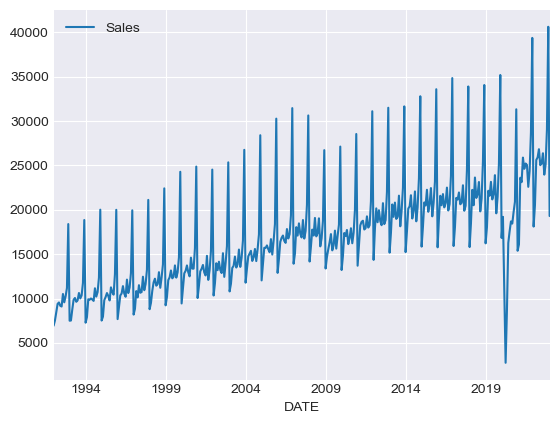

In [113]:
# Plot sales - Values in dataframe

df.plot();

<AxesSubplot:>

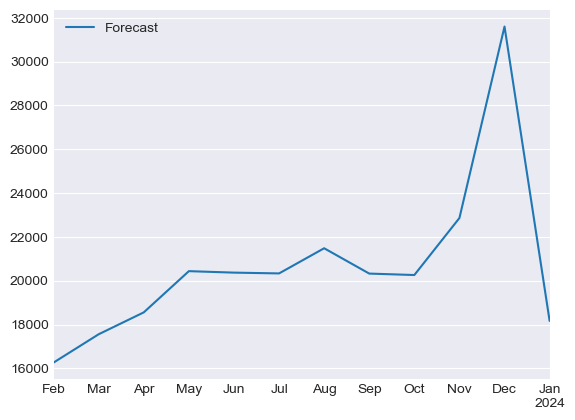

In [114]:
# Plot forecast - Values in forecast_df

forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<AxesSubplot:xlabel='DATE'>

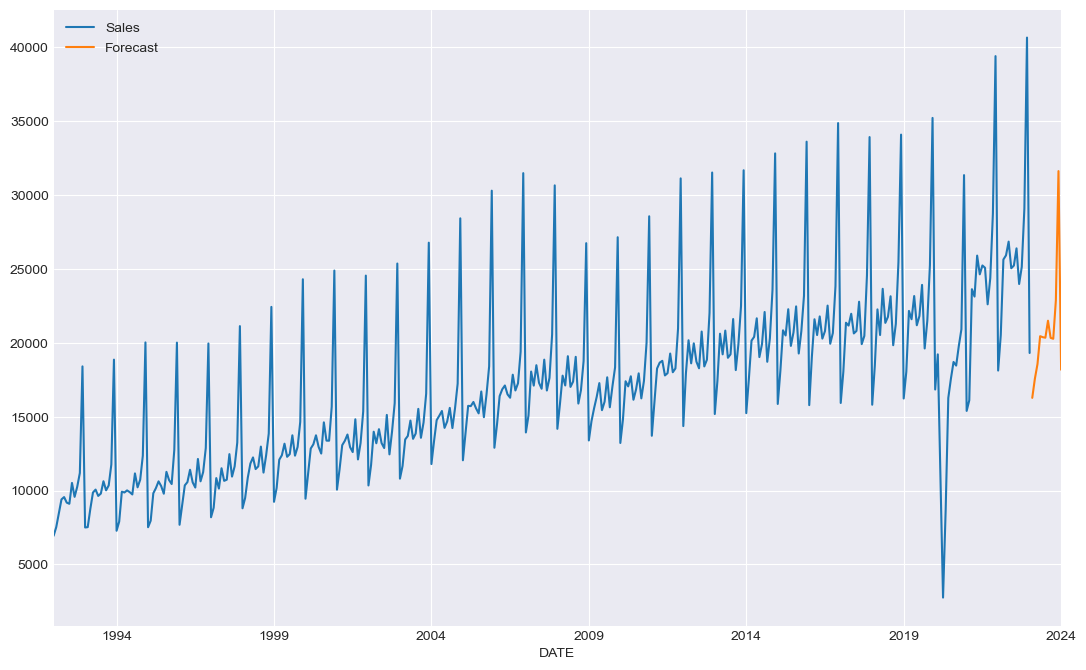

In [120]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)

(612.0, 648.0)

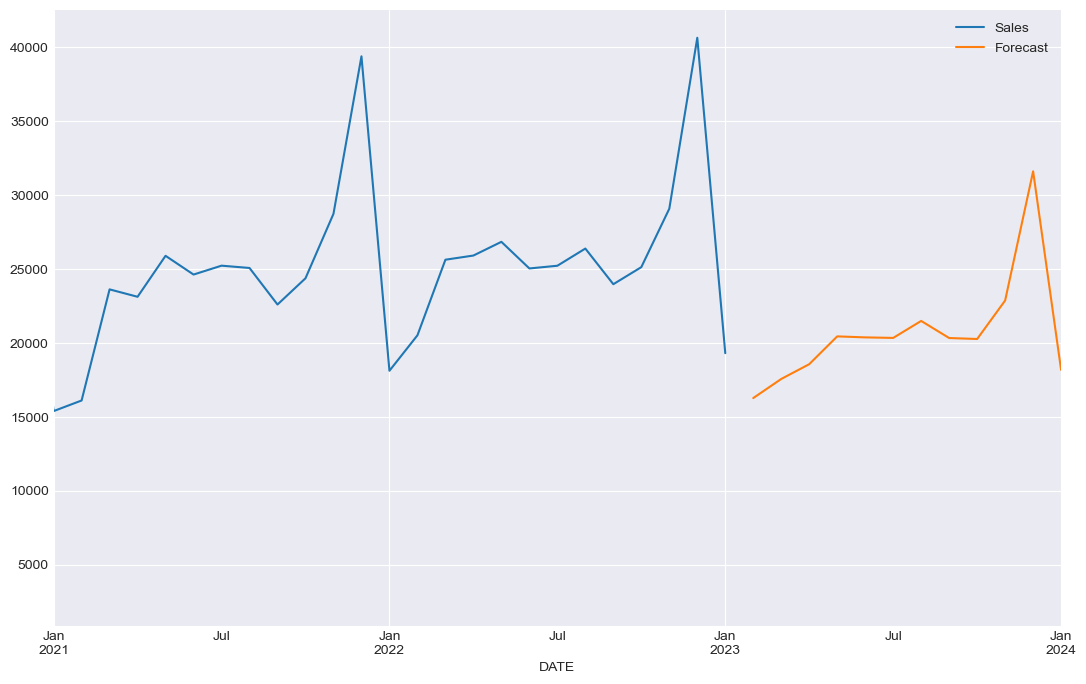

In [121]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.xlim('2021-01-01','2024-01-01')

### Cecking Forecast for last 12 months

In [122]:
forecast_index = pd.date_range(start='2022-02-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [123]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

(576.0, 636.0)

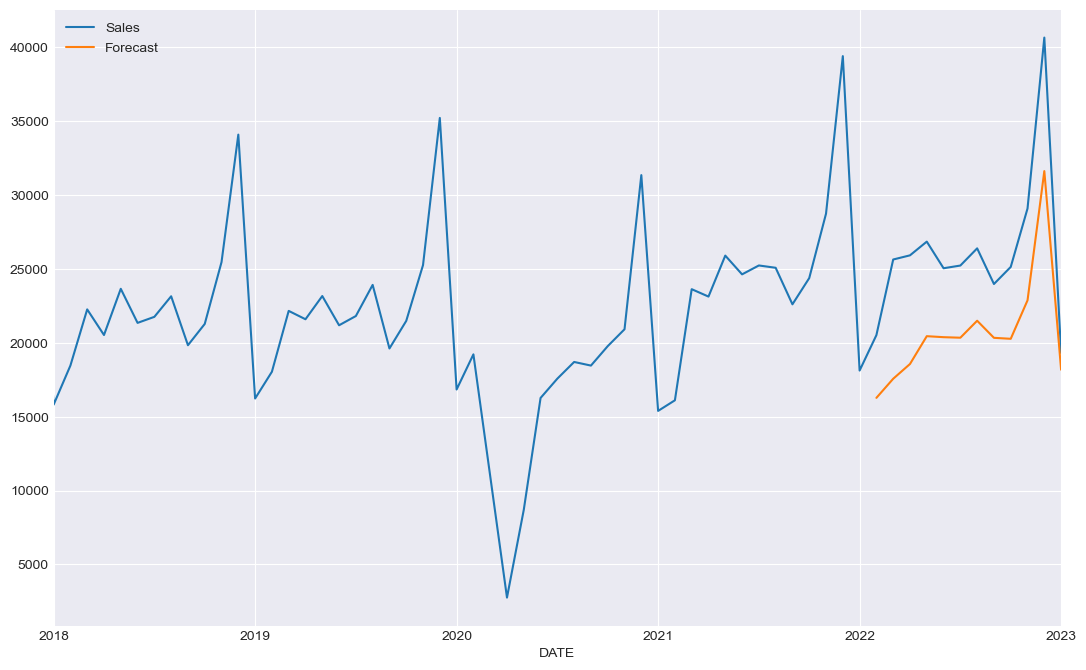

In [126]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2023-01-01')